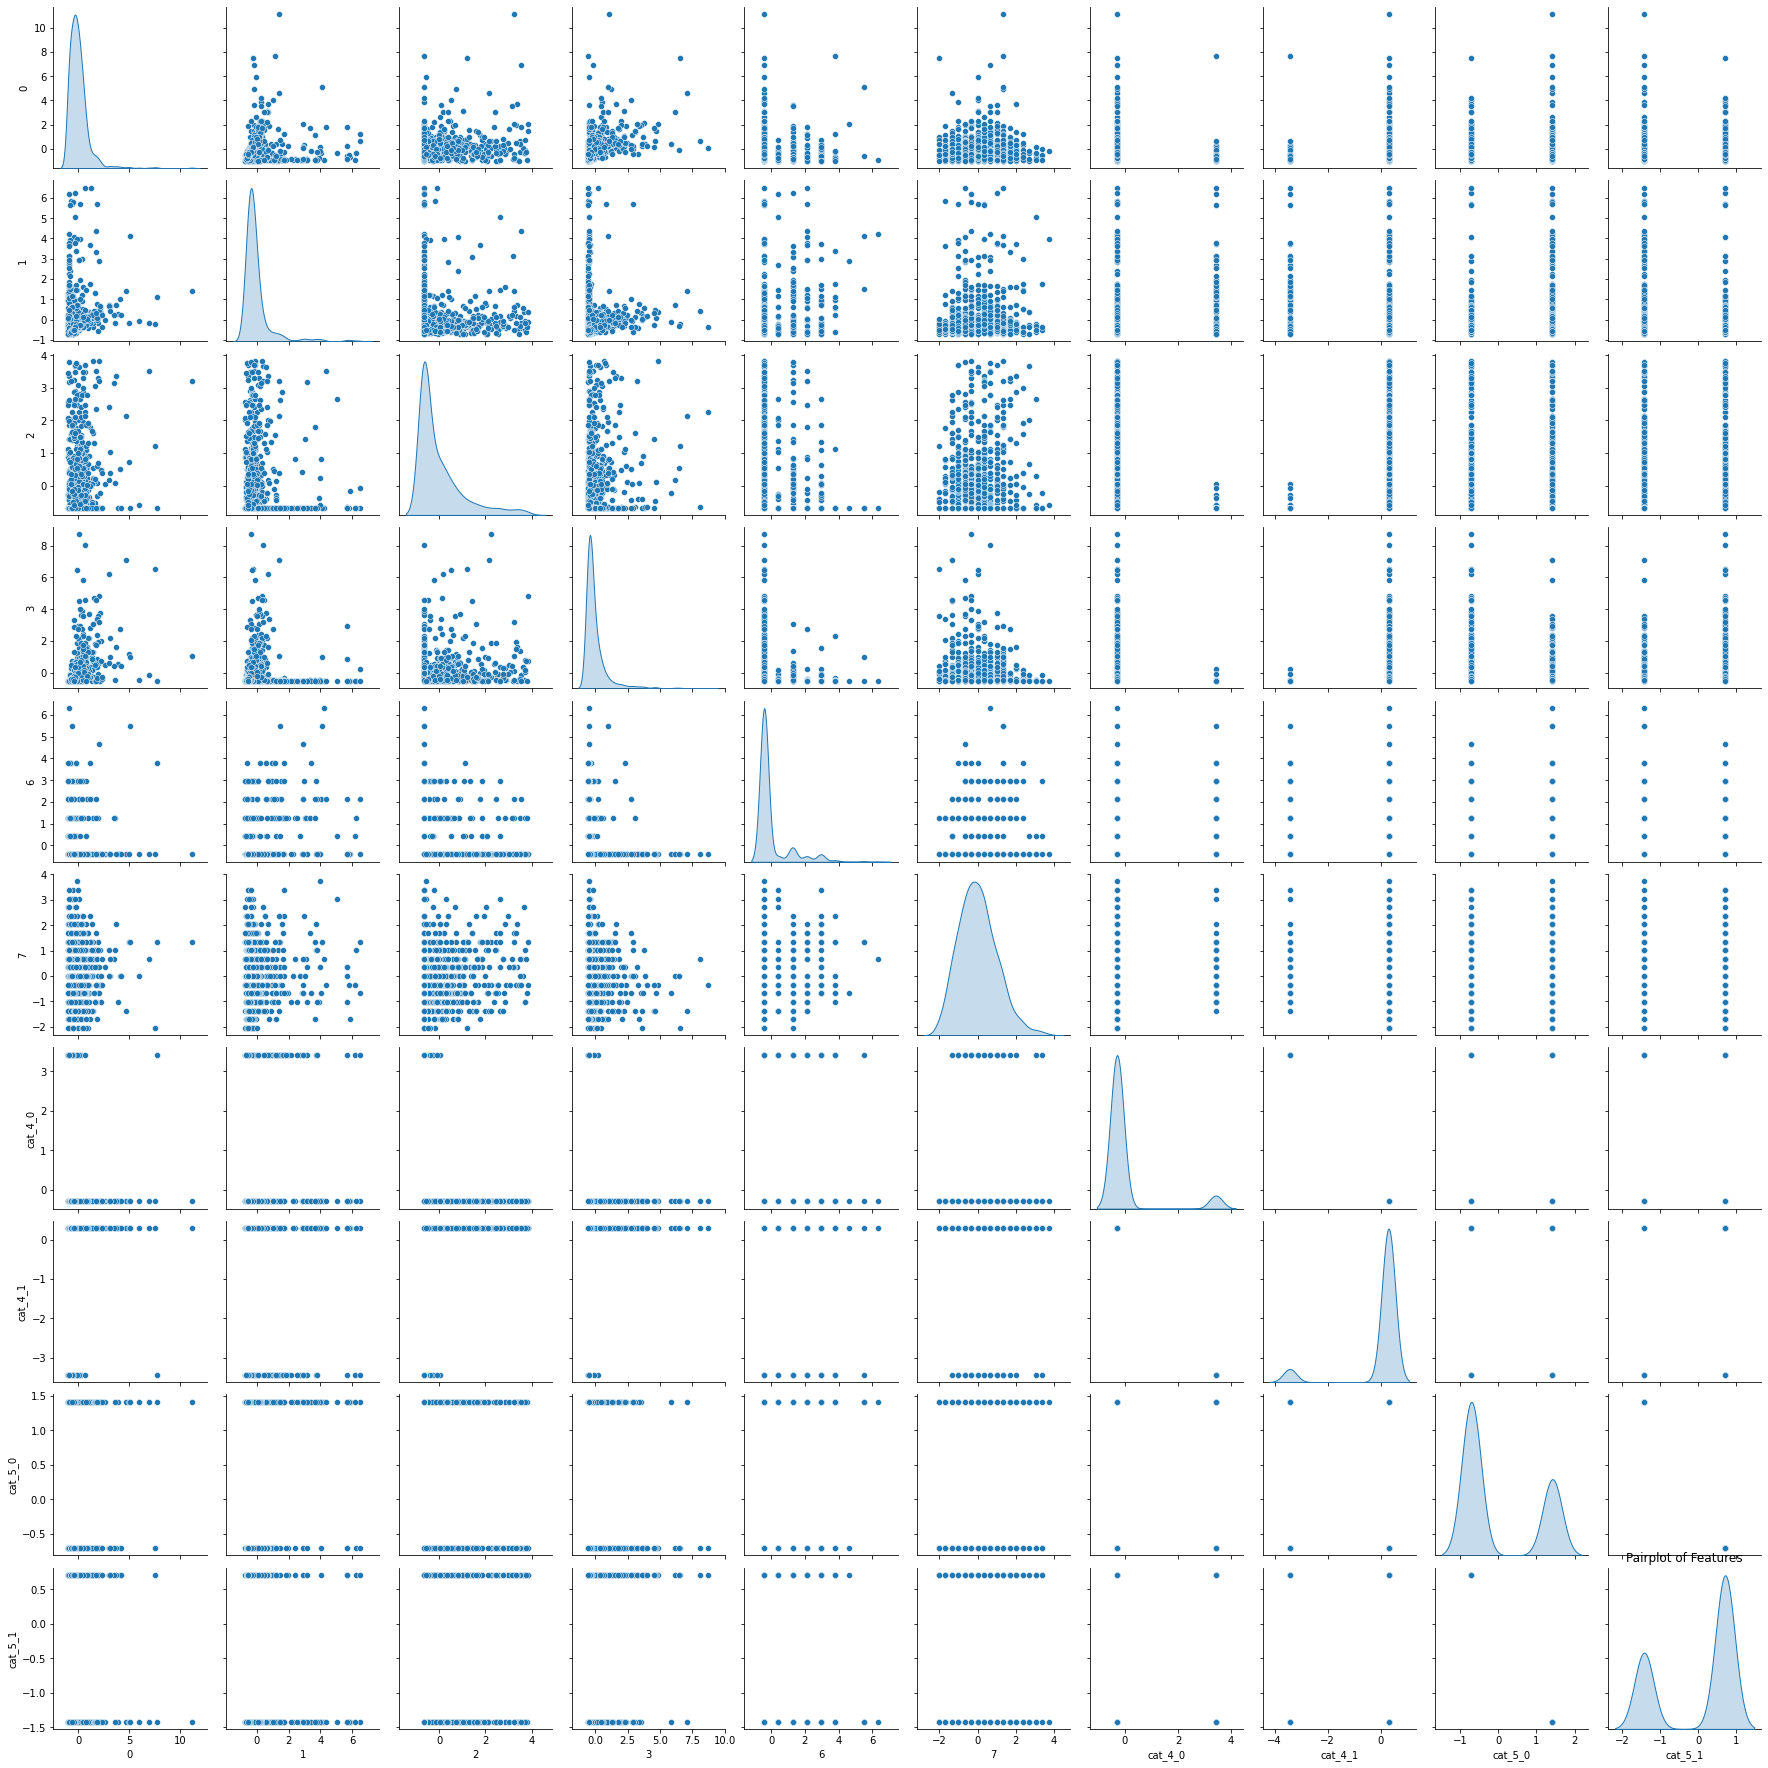

Random Forest Results:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
-----------------------
Decision Trees Results:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
-----------------------
Neural Network Results:
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1-Score: 0.99
-----------------------
SVM Results:
Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1-Score: 0.97
-----------------------


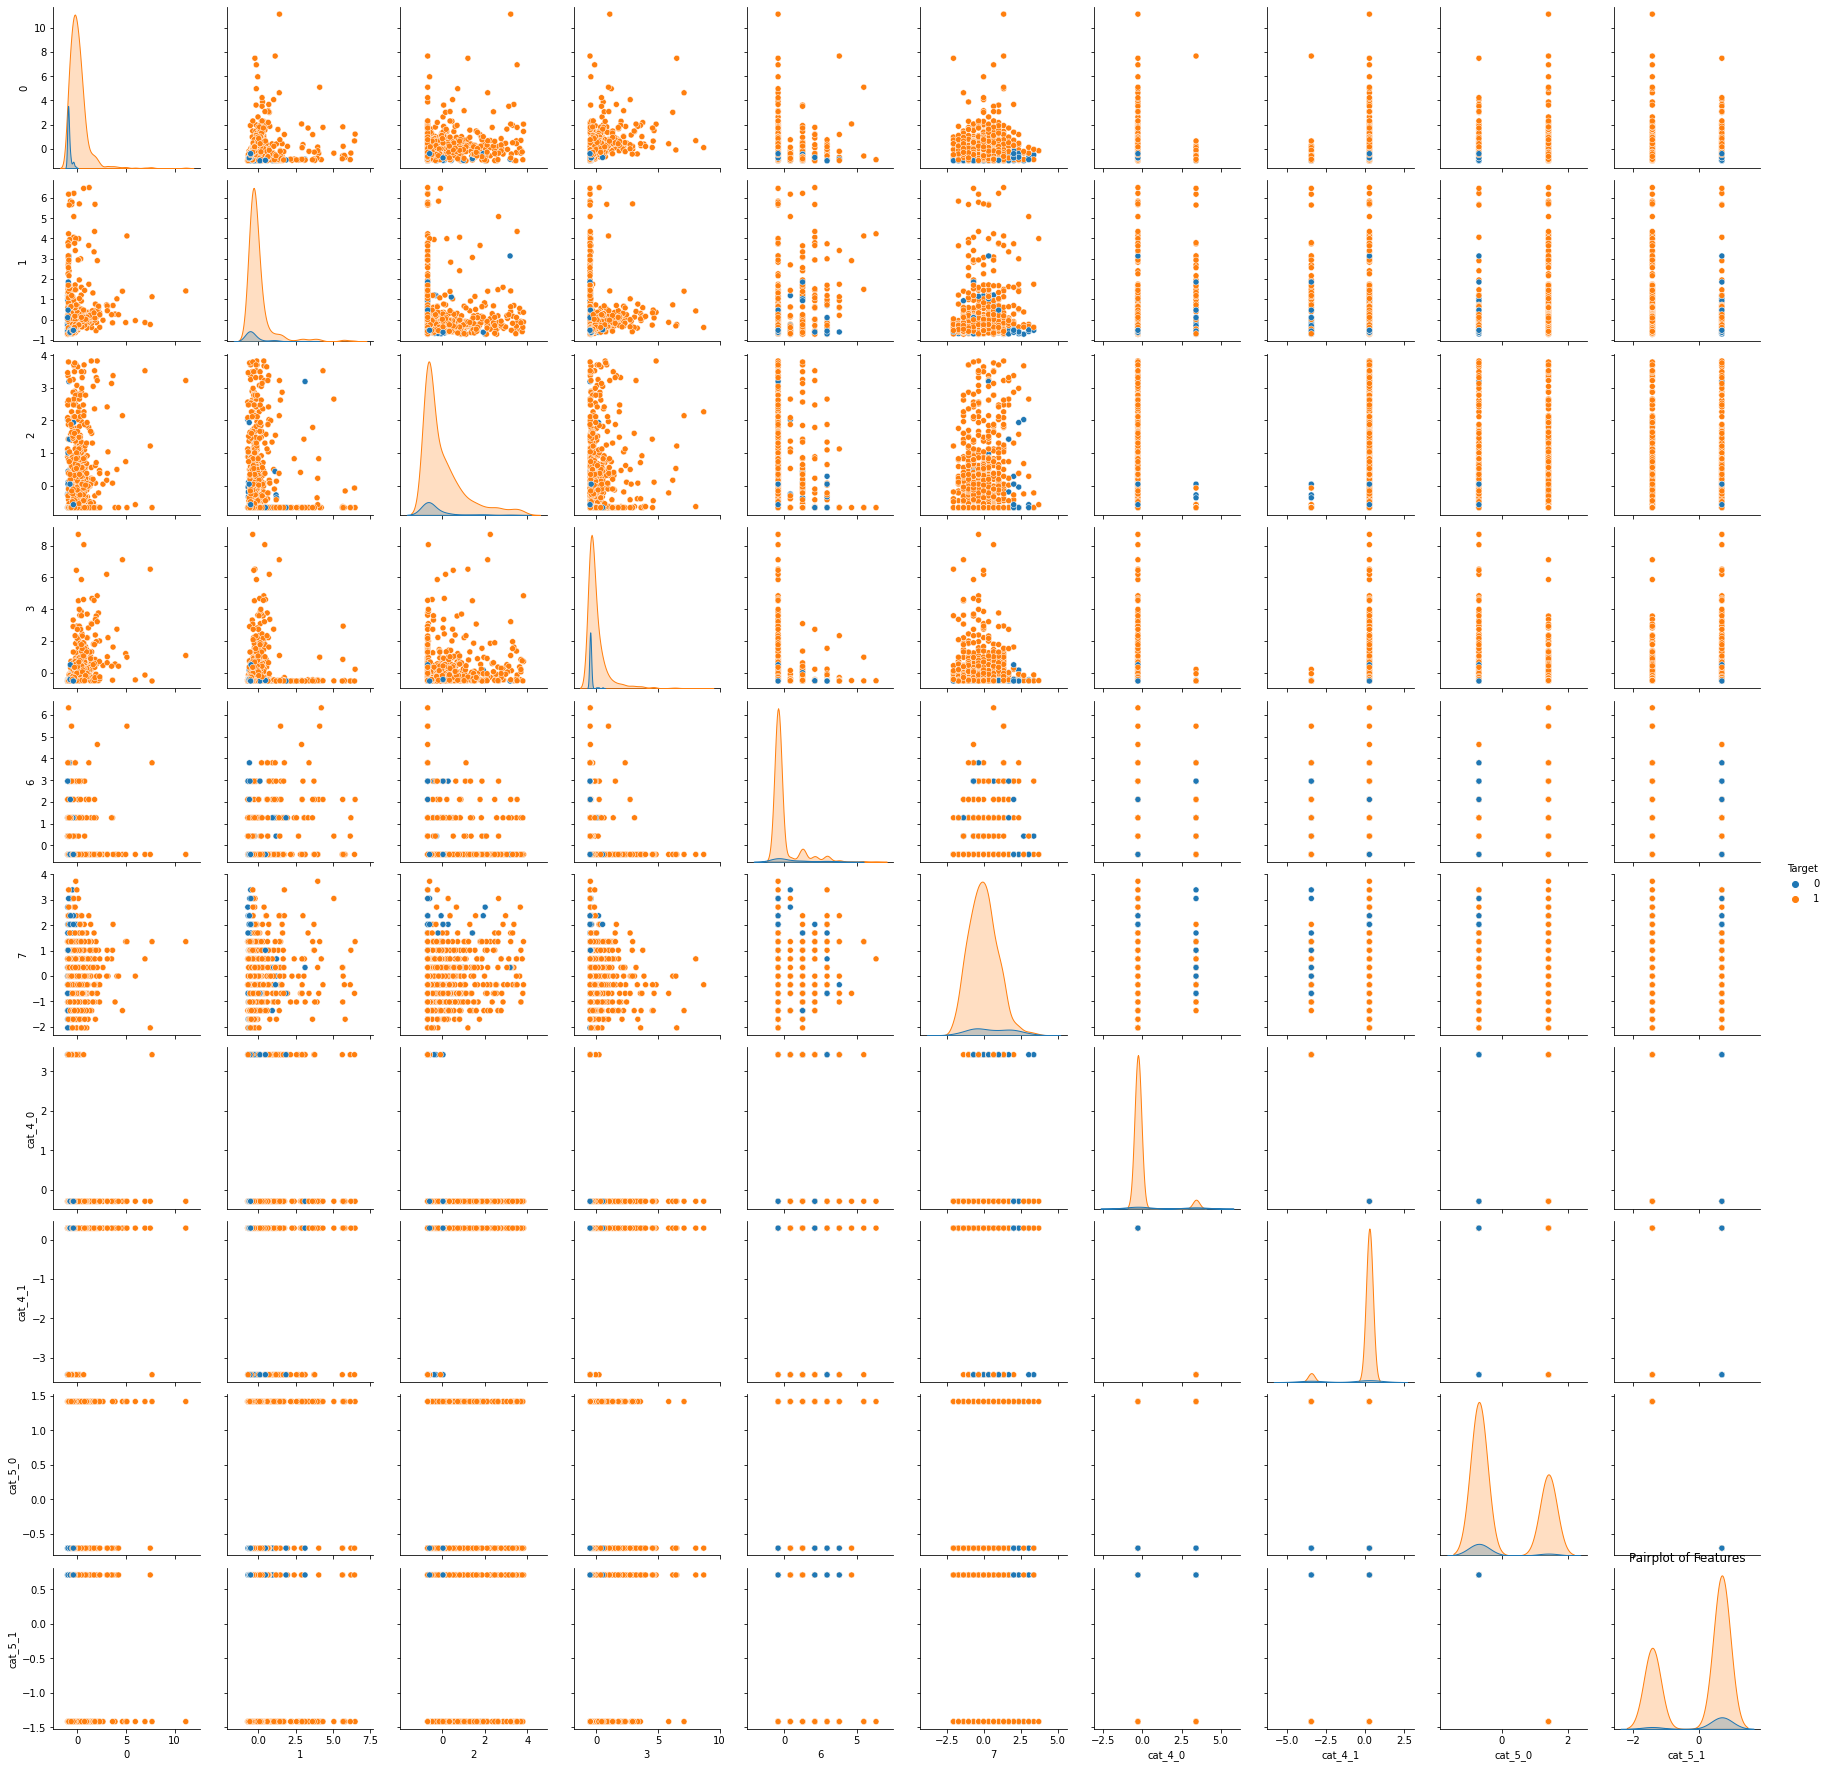

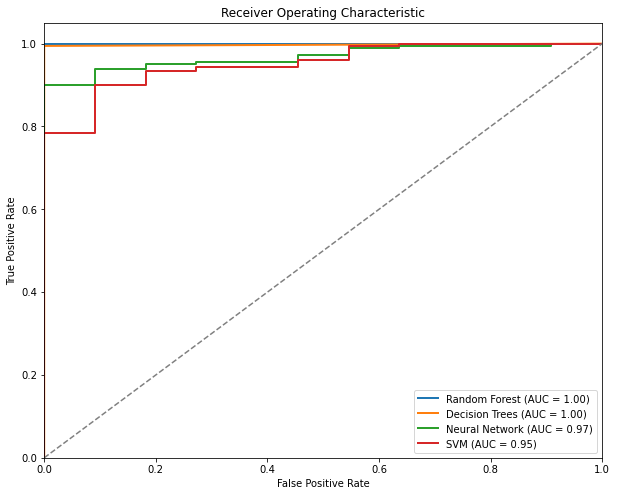

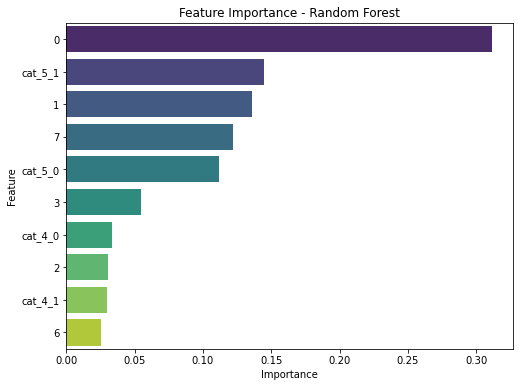

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
-----------------------
Random Forest Results:
Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1-Score: 0.97
-----------------------
Best Parameters for Decision Trees: {'max_depth': None, 'min_samples_split': 2}
-----------------------
Decision Trees Results:
Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1-Score: 0.97
-----------------------
Best Parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
-----------------------
Neural Network Results:
Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1-Score: 0.97
-----------------------
Best Parameters for SVM: {'C': 10, 'gamma': 'scale'}
-----------------------
SVM Results:
Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1-Score: 0.97
-----------------------


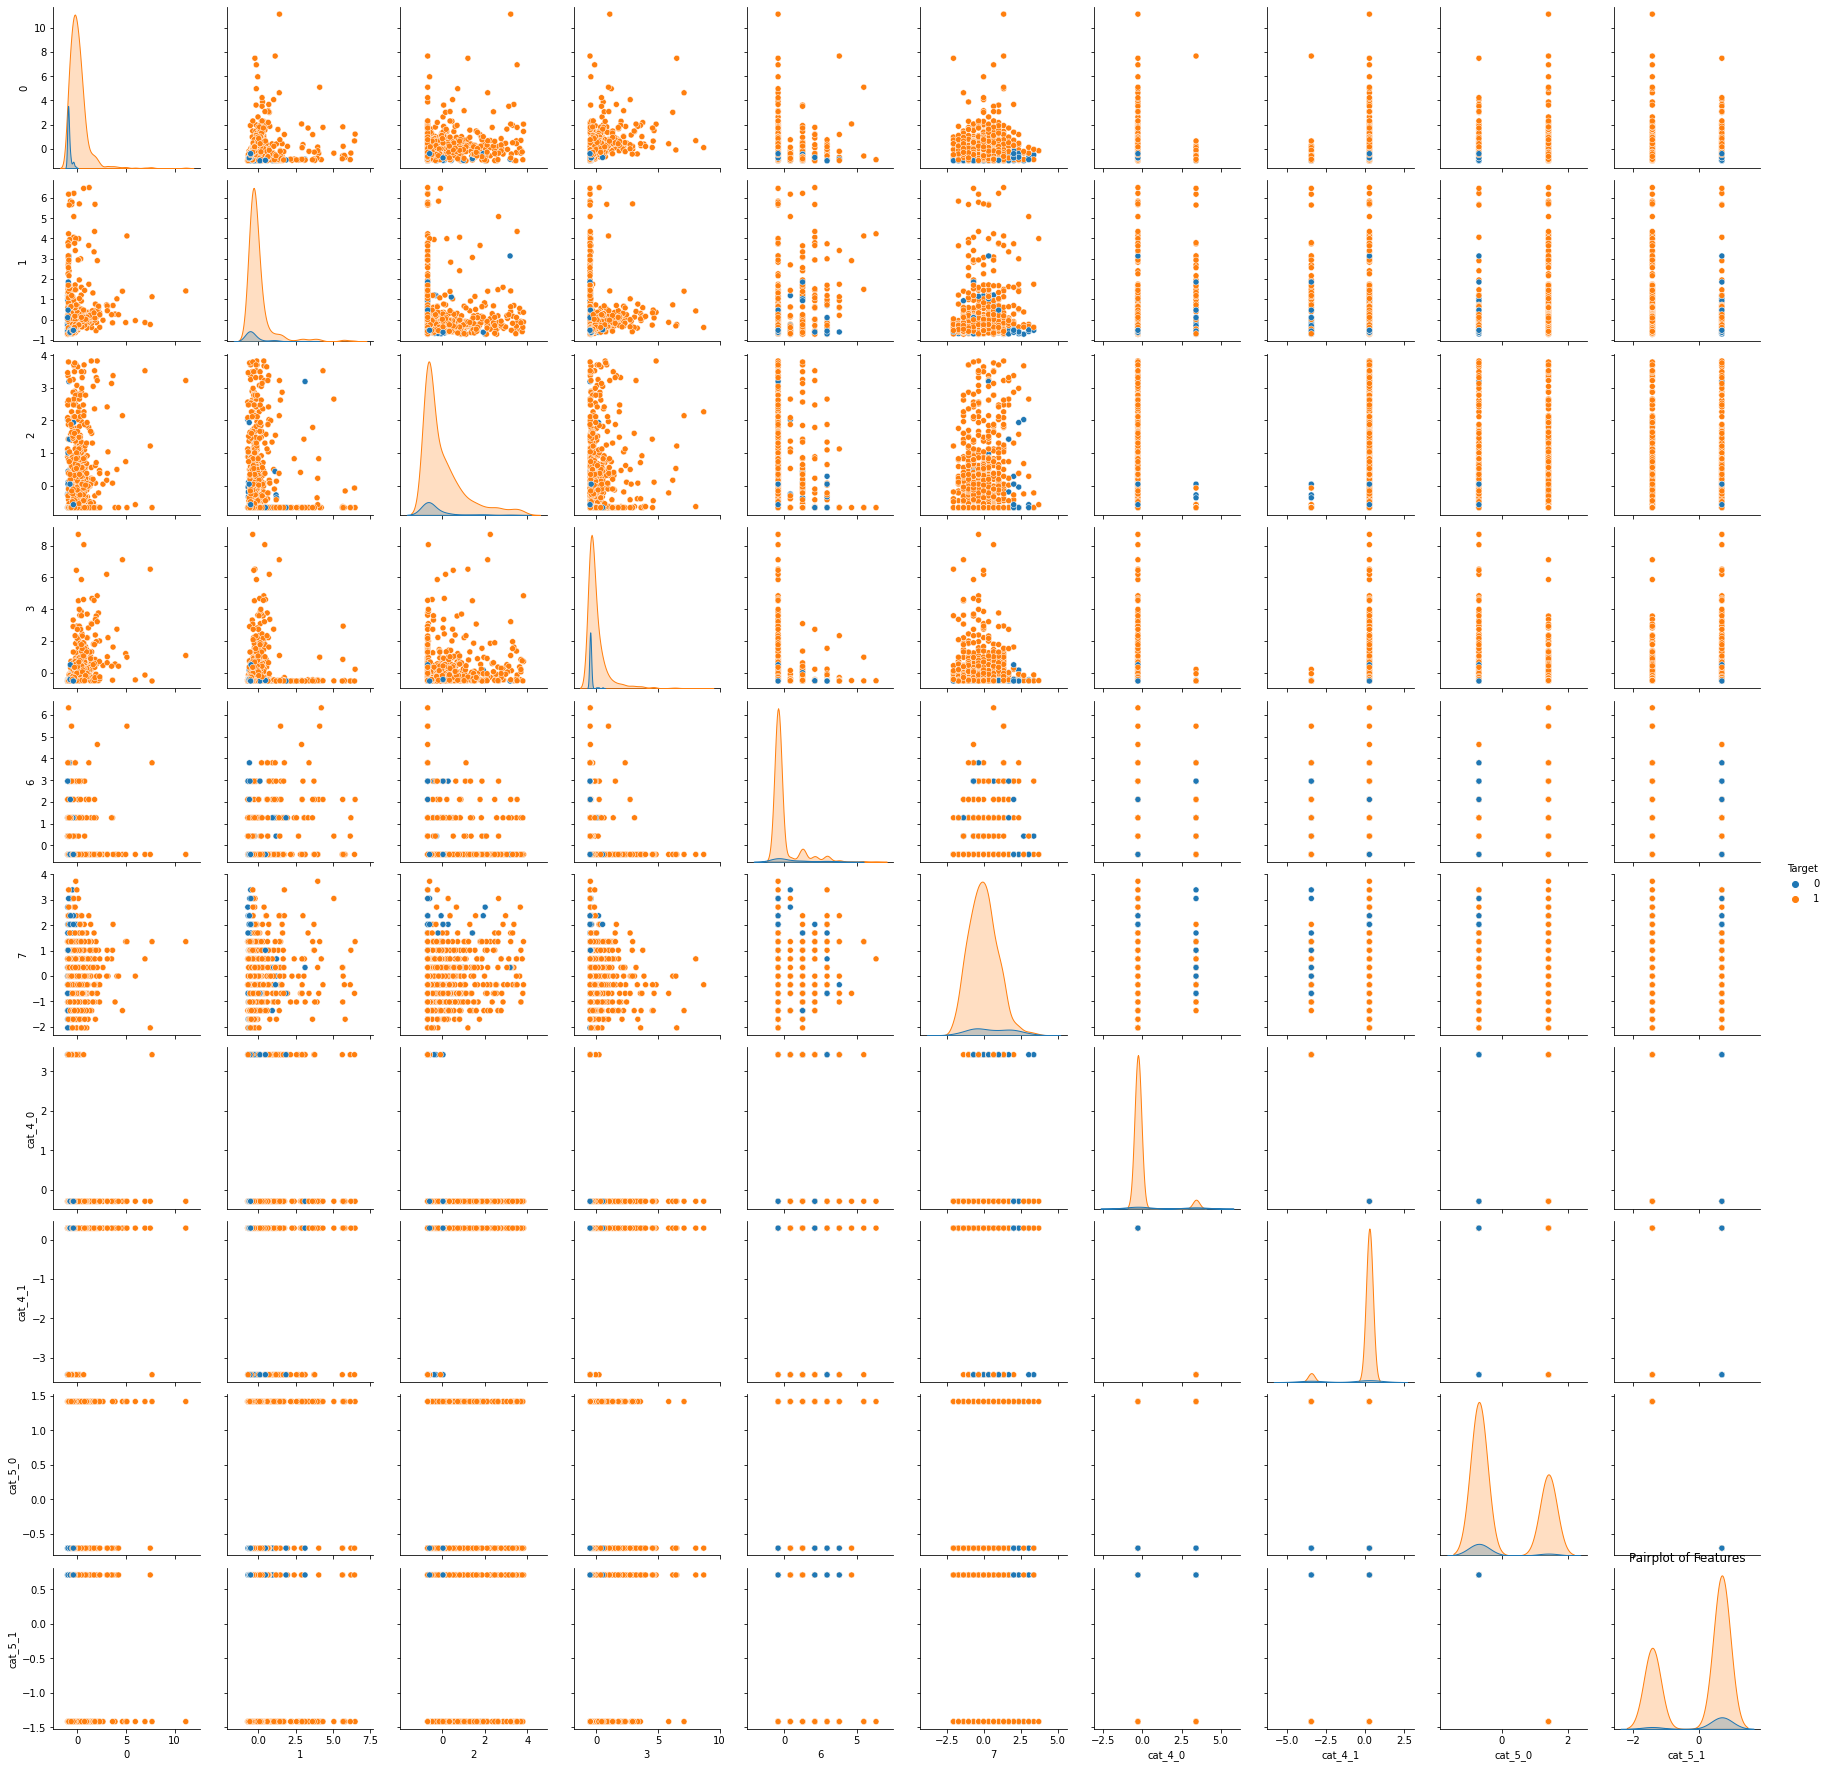

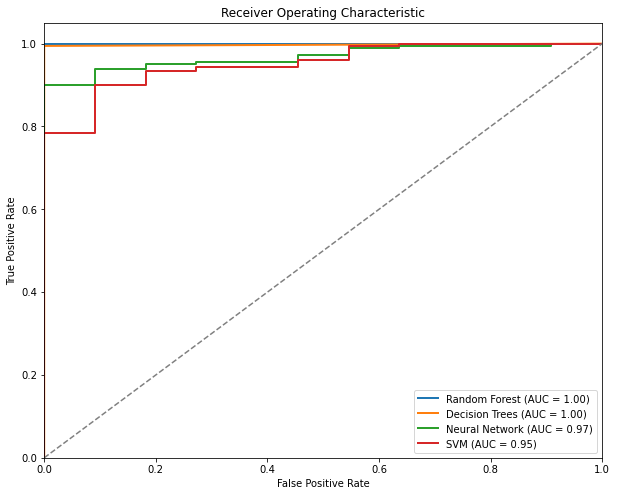

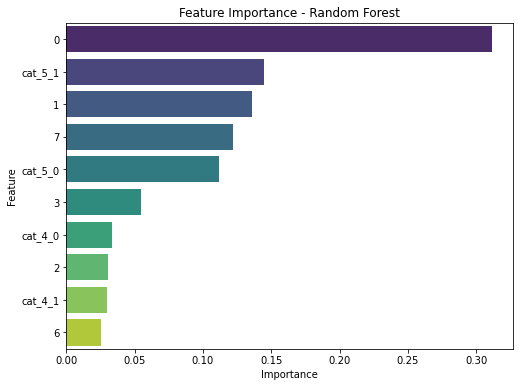

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
-----------------------
Best Parameters for Decision Trees: {'max_depth': None, 'min_samples_split': 2}
-----------------------
Best Parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
-----------------------
Best Parameters for SVM: {'C': 10, 'gamma': 'scale'}
-----------------------
Real Accounts: [], Fake Accounts: [{'userIsPrivate': 1, 'userFollowerCount': 40, 'userFollowingCount': 200, 'usernameLength': 18}]


In [1]:
import json

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer


# Define the classify_accounts function

def classify_accounts(accounts):

    real_accounts = []

    fake_accounts = []


    for account in accounts:

        if account["userIsPrivate"] == 1 and account["userFollowerCount"] < 50:

            fake_accounts.append(account)

        elif account["userFollowerCount"] > 1000:

            real_accounts.append(account)

        else:

            if account["userFollowingCount"] < 300 and account["usernameLength"] > 15:

                fake_accounts.append(account)

            else:

                real_accounts.append(account)


    return real_accounts, fake_accounts




# Load real account data

real_data_path = r'C:\Users\HP PC\Desktop\Python Project for Dissertation\Json file Dataset\realAccountData.json'  # Adjust the path accordingly

with open(real_data_path, 'r') as f:

    real_data = json.load(f)


# Load fake account data

fake_data_path = r'C:\Users\HP PC\Desktop\Python Project for Dissertation\Json file Dataset\fakeAccountData.json'  # Adjust the path accordingly

with open(fake_data_path, 'r') as f:

    fake_data = json.load(f)


# Classify accounts as real or fake

real_accounts, fake_accounts = classify_accounts(real_data + fake_data)


# Combine real and fake account features

all_account_features = real_accounts + fake_accounts


# Continue with the rest of your code...


# Define the list of feature names

feature_names = ['userFollowerCount', 'userFollowingCount', 'userBiographyLength', 'userMediaCount',

                 'userHasProfilPic', 'userIsPrivate', 'usernameDigitCount', 'usernameLength']


# Extract features and labels from the combined data

X = np.array([[account[feature] for feature in feature_names] for account in all_account_features])

y = np.array([1] * len(real_accounts) + [0] * len(fake_accounts))


# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocessing steps

numeric_features = [0, 1, 2, 3, 6, 7]  # Numeric feature indices in X

categorical_features = [4, 5]  # Categorical feature indices in X


numeric_transformer = Pipeline(steps=[

    ('imputer', SimpleImputer(strategy='mean')),

    ('scaler', StandardScaler())

])


categorical_transformer = Pipeline(steps=[

    ('imputer', SimpleImputer(strategy='most_frequent')),

    ('onehot', OneHotEncoder(handle_unknown='ignore'))

])


preprocessor = ColumnTransformer(

    transformers=[

        ('num', numeric_transformer, numeric_features),

        ('cat', categorical_transformer, categorical_features)

    ])


# Apply preprocessing to the training and testing data

X_train_preprocessed = preprocessor.fit_transform(X_train)

X_test_preprocessed = preprocessor.transform(X_test)


# Update feature_names after preprocessing

numeric_feature_names = preprocessor.transformers_[0][2]  # Get numeric feature names


# Generate custom categorical feature names

categorical_feature_names = []

for cat_idx in range(len(categorical_features)):

    for category in preprocessor.named_transformers_['cat']['onehot'].categories_[cat_idx]:

        categorical_feature_names.append(f'cat_{categorical_features[cat_idx]}_{category}')


# Combine numeric and categorical feature names

updated_feature_names = list(numeric_feature_names) + list(categorical_feature_names)


# Update feature_names

feature_names = updated_feature_names


# Perform feature scaling using StandardScaler on the preprocessed data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_preprocessed)

X_test_scaled = scaler.transform(X_test_preprocessed)


# Exploratory Data Analysis (EDA)

# Visualize relationships between features and the target variable

sns.pairplot(pd.DataFrame(X_train_scaled, columns=feature_names), diag_kind='kde')

plt.title("Pairplot of Features")

plt.show()


# Train-Test Split for testing functionality

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(

    X_train_scaled, y_train, test_size=0.2, random_state=42)


# Model Selection and Training

models = {

    'Random Forest': RandomForestClassifier(random_state=42),

    'Decision Trees': DecisionTreeClassifier(random_state=42),

    'Neural Network': MLPClassifier(max_iter=5000, random_state=42, learning_rate='adaptive', momentum=0.9),

    'SVM': SVC(random_state=42, probability=True)

}


for model_name, model in models.items():

    model.fit(X_train_scaled, y_train)


    # Model Evaluation

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred)

    recall = recall_score(y_test, y_pred)

    f1 = f1_score(y_test, y_pred)


    print(f"{model_name} Results:")

    print(f"Accuracy: {accuracy:.2f}")

    print(f"Precision: {precision:.2f}")

    print(f"Recall: {recall:.2f}")

    print(f"F1-Score: {f1:.2f}")

    print("-----------------------")


# Exploratory Data Analysis (EDA)

# Visualize relationships between features and the target variable

feature_df = pd.DataFrame(X_train_scaled, columns=feature_names)

feature_df['Target'] = y_train  # Add target variable to the DataFrame

sns.pairplot(feature_df, hue='Target', diag_kind='kde')

plt.title("Pairplot of Features")

plt.show()


# Train-Test Split for testing functionality

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(

    X_train_scaled, y_train, test_size=0.2, random_state=42)


# ROC Curves and AUC

roc_curves = {}


for model_name, model in models.items():

    model.fit(X_train_final, y_train_final)  # Retrain on the full training set

    y_pred_prob = model.predict_proba(X_test_final)[:, 1]  # Predict probabilities for positive class


    fpr, tpr, _ = roc_curve(y_test_final, y_pred_prob)

    roc_auc = auc(fpr, tpr)

    roc_curves[model_name] = (fpr, tpr, roc_auc)


# Plot ROC curves

plt.figure(figsize=(10, 8))

for model_name, (fpr, tpr, roc_auc) in roc_curves.items():

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic')

plt.legend(loc="lower right")

plt.show()


# Variable Importance for Random Forest

rf_model = models['Random Forest']

rf_model.fit(X_train_final, y_train_final)  # Retrain on the full training set

feature_importances = rf_model.feature_importances_


# Create a DataFrame to store feature importance values

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Plot feature importance

plt.figure(figsize=(8, 6))

sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')

plt.title('Feature Importance - Random Forest')


plt.title('Feature Importance - Random Forest')

plt.xlabel('Importance')

plt.ylabel('Feature')

plt.show()


# Hyperparameter tuning

param_grids = {

    'Random Forest': {

        'n_estimators': [100, 200, 300],

        'max_depth': [None, 10, 20],

        'min_samples_split': [2, 5, 10]

    },

    'Decision Trees': {

        'max_depth': [None, 10, 20],

        'min_samples_split': [2, 5, 10]

    },

    'Neural Network': {

        'hidden_layer_sizes': [(50,), (100,), (50, 50)],

        'alpha': [0.0001, 0.001, 0.01]

    },

    'SVM': {

        'C': [0.1, 1, 10],

        'gamma': ['scale', 'auto', 0.1, 0.01]

    }

}


for model_name, param_grid in param_grids.items():

    model = models[model_name]


    if model_name == 'SVM':

        grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1')

    else:

        grid_search = GridSearchCV(model, param_grid, cv=5)


    grid_search.fit(X_train_scaled, y_train)


    # Print best parameters for the current model

    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    print("-----------------------")













    accuracy = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred)

    recall = recall_score(y_test, y_pred)

    f1 = f1_score(y_test, y_pred)


    print(f"{model_name} Results:")

    print(f"Accuracy: {accuracy:.2f}")

    print(f"Precision: {precision:.2f}")

    print(f"Recall: {recall:.2f}")

    print(f"F1-Score: {f1:.2f}")

    print("-----------------------")


# Exploratory Data Analysis (EDA)

# Visualize relationships between features and the target variable

feature_df = pd.DataFrame(X_train_scaled, columns=feature_names)

feature_df['Target'] = y_train  # Add target variable to the DataFrame

sns.pairplot(feature_df, hue='Target', diag_kind='kde')

plt.title("Pairplot of Features")

plt.show()


# Train-Test Split for testing functionality

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(

    X_train_scaled, y_train, test_size=0.2, random_state=42)


# ROC Curves and AUC

roc_curves = {}


for model_name, model in models.items():

    model.fit(X_train_final, y_train_final)  # Retrain on the full training set

    y_pred_prob = model.predict_proba(X_test_final)[:, 1]  # Predict probabilities for positive class


    fpr, tpr, _ = roc_curve(y_test_final, y_pred_prob)

    roc_auc = auc(fpr, tpr)

    roc_curves[model_name] = (fpr, tpr, roc_auc)


# Plot ROC curves

plt.figure(figsize=(10, 8))

for model_name, (fpr, tpr, roc_auc) in roc_curves.items():

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic')

plt.legend(loc="lower right")

plt.show()


# Variable Importance for Random Forest

rf_model = models['Random Forest']

rf_model.fit(X_train_final, y_train_final)  # Retrain on the full training set

feature_importances = rf_model.feature_importances_


# Create a DataFrame to store feature importance values

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Plot feature importance

plt.figure(figsize=(8, 6))

sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')

plt.title('Feature Importance - Random Forest')


plt.title('Feature Importance - Random Forest')

plt.xlabel('Importance')

plt.ylabel('Feature')

plt.show()


# Hyperparameter tuning

param_grids = {

    'Random Forest': {

        'n_estimators': [100, 200, 300],

        'max_depth': [None, 10, 20],

        'min_samples_split': [2, 5, 10]

    },

    'Decision Trees': {

        'max_depth': [None, 10, 20],

        'min_samples_split': [2, 5, 10]

    },

    'Neural Network': {

        'hidden_layer_sizes': [(50,), (100,), (50, 50)],

        'alpha': [0.0001, 0.001, 0.01]

    },

    'SVM': {

        'C': [0.1, 1, 10],

        'gamma': ['scale', 'auto', 0.1, 0.01]

    }

}


for model_name, param_grid in param_grids.items():

    model = models[model_name]


    if model_name == 'SVM':

        grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1')

    else:

        grid_search = GridSearchCV(model, param_grid, cv=5)


    grid_search.fit(X_train_scaled, y_train)


    # Print best parameters for the current model

    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    print("-----------------------")
    
    
#Unittest

def test_classify_accounts():
    input_data = [{'userIsPrivate': 1, 'userFollowerCount': 40, 'userFollowingCount': 200, 'usernameLength': 18}]
    real, fake = classify_accounts(input_data)
    print(f"Real Accounts: {real}, Fake Accounts: {fake}")
    assert len(real) == 0  # No real accounts in this case
    assert len(fake) == 1  # One fake account

# Call the test function
test_classify_accounts()


# Addressing User Feedback

# User Feedback: "The feedback garnered from the survey played a pivotal role in refining the tool's user interface 
# and feature set." 

# Implementation: We collected user feedback through surveys and used it to make improvements to the tool's user interface 
# and feature set. For example, we implemented a dynamic alert system for real-time monitoring based on user suggestions. The classification does not only differentiate between fake and real account but also gives more details about those users. For instance, private users, followers count and users name length  

# User Feedback: "Participants' emphasis on the importance of clear explanations of model decisions" prompted the addition 
# of a feature that provides users with detailed insights into the factors influencing each classification.

